In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN, HDBSCAN
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, silhouette_score


In [4]:
#chargement des données
data = pd.read_csv('C:/Users/genev/Downloads/Medicaldataset.csv')

In [5]:
#affichage de la base de donnée
data

,Age,Gender,Heart rate,Systolic blood pressure,Diastolic blood pressure,Blood sugar,CK-MB,Troponin,Result
0,64,1,66,160,83,160.0,1.80,0.012,negative
1,21,1,94,98,46,296.0,6.75,1.060,positive
2,55,1,64,160,77,270.0,1.99,0.003,negative
3,64,1,70,120,55,270.0,13.87,0.122,positive
4,55,1,64,112,65,300.0,1.08,0.003,negative
...,...,...,...,...,...,...,...,...,...
1314,44,1,94,122,67,204.0,1.63,0.006,negative
1315,66,1,84,125,55,149.0,1.33,0.172,positive
1316,45,1,85,168,104,96.0,1.24,4.250,positive
1317,54,1,58,117,68,443.0,5.80,0.359,positive


In [6]:
# Especter des valeurs manquantes
data.isnull().sum()

Age                         0
Gender                      0
Heart rate                  0
Systolic blood pressure     0
Diastolic blood pressure    0
Blood sugar                 0
CK-MB                       0
Troponin                    0
Result                      0
dtype: int64

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1319 entries, 0 to 1318
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       1319 non-null   int64  
 1   Gender                    1319 non-null   int64  
 2   Heart rate                1319 non-null   int64  
 3   Systolic blood pressure   1319 non-null   int64  
 4   Diastolic blood pressure  1319 non-null   int64  
 5   Blood sugar               1319 non-null   float64
 6   CK-MB                     1319 non-null   float64
 7   Troponin                  1319 non-null   float64
 8   Result                    1319 non-null   object 
dtypes: float64(3), int64(5), object(1)
memory usage: 92.9+ KB


In [8]:
#Afficher des statistiques descriptives 
data.describe()

,Age,Gender,Heart rate,Systolic blood pressure,Diastolic blood pressure,Blood sugar,CK-MB,Troponin
count,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000
mean,56.191812,0.659591,78.336619,127.170584,72.269143,146.634344,15.274306,0.360942
std,13.647315,0.474027,51.630270,26.122720,14.033924,74.923045,46.327083,1.154568
min,14.000000,0.000000,20.000000,42.000000,38.000000,35.000000,0.321000,0.001000
25%,47.000000,0.000000,64.000000,110.000000,62.000000,98.000000,1.655000,0.006000
50%,58.000000,1.000000,74.000000,124.000000,72.000000,116.000000,2.850000,0.014000
75%,65.000000,1.000000,85.000000,143.000000,81.000000,169.500000,5.805000,0.085500
max,103.000000,1.000000,1111.000000,223.000000,154.000000,541.000000,300.000000,10.300000


In [9]:
#affichage des colonne
data.columns

Index(['Age', 'Gender', 'Heart rate', 'Systolic blood pressure',
       'Diastolic blood pressure', 'Blood sugar', 'CK-MB', 'Troponin',
       'Result'],
      dtype='object')

In [10]:
# affichage de nombre de ligne et colonne
data.shape

(1319, 9)

In [11]:
# une copie de la base de donnée stockée dans df# important car elle permet de récupérer la base de donnée intacte lorsqu'on rencontre 
#un problème lors de l'analyse
df = data.copy()

## Data Preprocessing

Le but de cette partie est de normaliser des variables   **Blood sugar ( 1 si > 120 et 0 sinon)** et la variable **Result( 1 pour positive et 0 pour negative )**

In [12]:
f = lambda x : 1 if x> 120 else 0

In [13]:
df["Blood sugar"] = df["Blood sugar"].apply(f)

In [14]:
df

,Age,Gender,Heart rate,Systolic blood pressure,Diastolic blood pressure,Blood sugar,CK-MB,Troponin,Result
0,64,1,66,160,83,1,1.80,0.012,negative
1,21,1,94,98,46,1,6.75,1.060,positive
2,55,1,64,160,77,1,1.99,0.003,negative
3,64,1,70,120,55,1,13.87,0.122,positive
4,55,1,64,112,65,1,1.08,0.003,negative
...,...,...,...,...,...,...,...,...,...
1314,44,1,94,122,67,1,1.63,0.006,negative
1315,66,1,84,125,55,1,1.33,0.172,positive
1316,45,1,85,168,104,0,1.24,4.250,positive
1317,54,1,58,117,68,1,5.80,0.359,positive


In [15]:
g = lambda x : 1 if x=="positive" else 0

In [16]:
df["Result"] = df["Result"].apply(g)

In [17]:
df

,Age,Gender,Heart rate,Systolic blood pressure,Diastolic blood pressure,Blood sugar,CK-MB,Troponin,Result
0,64,1,66,160,83,1,1.80,0.012,0
1,21,1,94,98,46,1,6.75,1.060,1
2,55,1,64,160,77,1,1.99,0.003,0
3,64,1,70,120,55,1,13.87,0.122,1
4,55,1,64,112,65,1,1.08,0.003,0
...,...,...,...,...,...,...,...,...,...
1314,44,1,94,122,67,1,1.63,0.006,0
1315,66,1,84,125,55,1,1.33,0.172,1
1316,45,1,85,168,104,0,1.24,4.250,1
1317,54,1,58,117,68,1,5.80,0.359,1


In [18]:
# Encode categorical variables 
label_encoder = LabelEncoder()
df['Gender'] = label_encoder.fit_transform(df['Gender'])
df['Blood sugar'] = label_encoder.fit_transform(df['Blood sugar'])
df['Result'] = label_encoder.fit_transform(df['Result'])

## Data Spliting

In [19]:
# Split data into features and target variable
#Diviser les données en variables caractéristiques (ou attributs) et variable cible
X = df.drop(columns=['Result'])
y = df['Result']

In [20]:
X

,Age,Gender,Heart rate,Systolic blood pressure,Diastolic blood pressure,Blood sugar,CK-MB,Troponin
0,64,1,66,160,83,1,1.80,0.012
1,21,1,94,98,46,1,6.75,1.060
2,55,1,64,160,77,1,1.99,0.003
3,64,1,70,120,55,1,13.87,0.122
4,55,1,64,112,65,1,1.08,0.003
...,...,...,...,...,...,...,...,...
1314,44,1,94,122,67,1,1.63,0.006
1315,66,1,84,125,55,1,1.33,0.172
1316,45,1,85,168,104,0,1.24,4.250
1317,54,1,58,117,68,1,5.80,0.359


In [21]:
y

0       0
1       1
2       0
3       1
4       0
       ..
1314    0
1315    1
1316    1
1317    1
1318    1
Name: Result, Length: 1319, dtype: int64

In [22]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
X_train

,Age,Gender,Heart rate,Systolic blood pressure,Diastolic blood pressure,Blood sugar,CK-MB,Troponin
598,42,1,83,153,91,0,5.460,0.003
1213,76,1,134,111,69,0,2.370,0.031
209,60,1,68,42,64,0,0.879,0.426
538,52,0,89,130,80,1,1.950,0.020
140,45,0,79,87,47,0,2.380,0.003
...,...,...,...,...,...,...,...,...
1095,50,0,85,119,76,1,16.100,0.009
1130,57,1,78,101,54,0,0.826,0.014
1294,50,0,79,92,55,1,16.950,0.005
860,54,1,72,154,84,1,2.970,0.007


## La standardisation

In [25]:
# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [26]:
def train_predict_model(model,X_train,y_train,X_test):
    model.fit(X_train,y_train)
    return model.predict(X_test)

def evaluate_classifier(y_true, y_pred, classifier_name):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    print(f"Evaluation metrics for {classifier_name}:")
    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1 Score: {f1}\n")


In [27]:
dt_y_pred     = train_predict_model(DecisionTreeClassifier(),X_train_scaled, y_train,X_test_scaled)
rf_y_pred     = train_predict_model(RandomForestClassifier(),X_train_scaled, y_train,X_test_scaled)
adb_y_pred    = train_predict_model(AdaBoostClassifier(),X_train_scaled, y_train,X_test_scaled)    
svm_y_pred    = train_predict_model(SVC(),X_train_scaled, y_train,X_test_scaled)
knn_y_pred    = train_predict_model(KNeighborsClassifier(),X_train_scaled, y_train,X_test_scaled)
nb_y_pred     = train_predict_model(GaussianNB(),X_train_scaled, y_train,X_test_scaled)

#===============Evaluation====================

evaluate_classifier(y_test, dt_y_pred, "Decision Tree")
evaluate_classifier(y_test, rf_y_pred, "Random Forest")
evaluate_classifier(y_test, adb_y_pred, "AdaBoost")
evaluate_classifier(y_test, svm_y_pred, "SVM")
evaluate_classifier(y_test, knn_y_pred, "KNN")
evaluate_classifier(y_test, nb_y_pred, "Naive Bayes")

Evaluation metrics for Decision Tree:
Accuracy: 0.9810606060606061
Precision: 0.9817073170731707
Recall: 0.9877300613496932
F1 Score: 0.9847094801223242

Evaluation metrics for Random Forest:
Accuracy: 0.9810606060606061
Precision: 0.9817073170731707
Recall: 0.9877300613496932
F1 Score: 0.9847094801223242

Evaluation metrics for AdaBoost:
Accuracy: 0.9772727272727273
Precision: 0.9815950920245399
Recall: 0.9815950920245399
F1 Score: 0.98159509202454

Evaluation metrics for SVM:
Accuracy: 0.7348484848484849
Precision: 0.7540983606557377
Recall: 0.8466257668711656
F1 Score: 0.7976878612716763

Evaluation metrics for KNN:
Accuracy: 0.6439393939393939
Precision: 0.7041420118343196
Recall: 0.7300613496932515
F1 Score: 0.716867469879518

Evaluation metrics for Naive Bayes:
Accuracy: 0.7916666666666666
Precision: 0.990909090909091
Recall: 0.6687116564417178
F1 Score: 0.7985347985347986



Evaluation metrics for Decision Tree:
Accuracy: 0.9810606060606061
Precision: 0.9817073170731707
Recall: 0.9877300613496932
F1 Score: 0.9847094801223242

Evaluation metrics for Random Forest:
Accuracy: 0.9810606060606061
Precision: 0.9817073170731707
Recall: 0.9877300613496932
F1 Score: 0.9847094801223242

Evaluation metrics for AdaBoost:
Accuracy: 0.9772727272727273
Precision: 0.9815950920245399
Recall: 0.9815950920245399
F1 Score: 0.98159509202454

Evaluation metrics for SVM:
Accuracy: 0.7348484848484849
Precision: 0.7540983606557377
Recall: 0.8466257668711656
F1 Score: 0.7976878612716763

Evaluation metrics for KNN:
Accuracy: 0.6439393939393939
Precision: 0.7041420118343196
Recall: 0.7300613496932515
F1 Score: 0.716867469879518

Evaluation metrics for Naive Bayes:
Accuracy: 0.7916666666666666
Precision: 0.990909090909091
Recall: 0.6687116564417178
F1 Score: 0.7985347985347986



C:\Users\genev\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\genev\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


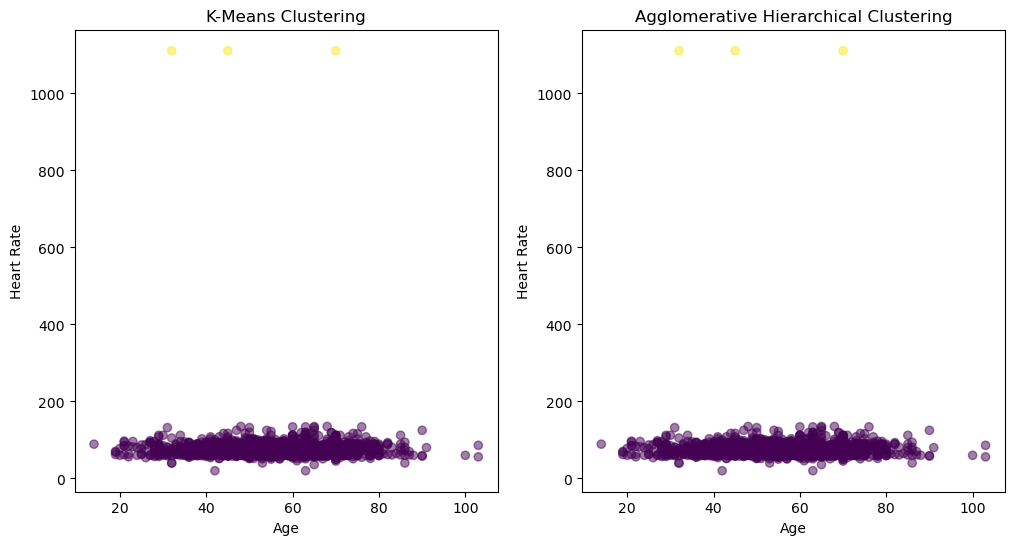

In [46]:
# Classification Algorithms
# Decision Tree
dt_classifier = DecisionTreeClassifier(criterion="entropy")
dt_classifier.fit(X_train_scaled, y_train)
dt_y_pred = dt_classifier.predict(X_test_scaled)

# Random Forest
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train_scaled, y_train)
rf_y_pred = rf_classifier.predict(X_test_scaled)

# AdaBoost
adb_classifier = AdaBoostClassifier()
adb_classifier.fit(X_train_scaled, y_train)
adb_y_pred = adb_classifier.predict(X_test_scaled)

# SVM
svm_classifier = SVC()
svm_classifier.fit(X_train_scaled, y_train)
svm_y_pred = svm_classifier.predict(X_test_scaled)

# KNN
knn_classifier = KNeighborsClassifier()
knn_classifier.fit(X_train_scaled, y_train)
knn_y_pred = knn_classifier.predict(X_test_scaled)

# Naive Bayes
nb_classifier = GaussianNB()
nb_classifier.fit(X_train_scaled, y_train)
nb_y_pred = nb_classifier.predict(X_test_scaled)

# Evaluation Metrics
def evaluate_classifier(y_true, y_pred, classifier_name):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    print(f"Evaluation metrics for {classifier_name}:")
    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1 Score: {f1}\n")

evaluate_classifier(y_test, dt_y_pred, "Decision Tree")
evaluate_classifier(y_test, rf_y_pred, "Random Forest")
evaluate_classifier(y_test, adb_y_pred, "AdaBoost")
evaluate_classifier(y_test, svm_y_pred, "SVM")
evaluate_classifier(y_test, knn_y_pred, "KNN")
evaluate_classifier(y_test, nb_y_pred, "Naive Bayes")

# Clustering
# K-Means
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
kmeans_labels = kmeans.labels_

# Agglomerative Hierarchical Clustering
agg_clustering = AgglomerativeClustering(n_clusters=2)
agg_labels = agg_clustering.fit_predict(X)

# Visualization
# Plotting 2D scatter plot for clustering
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(X['Age'], X['Heart rate'], c=kmeans_labels, cmap='viridis', marker='o', alpha=0.5)
plt.title('K-Means Clustering')
plt.xlabel('Age')
plt.ylabel('Heart Rate')

plt.subplot(1, 2, 2)
plt.scatter(X['Age'], X['Heart rate'], c=agg_labels, cmap='viridis', marker='o', alpha=0.5)
plt.title('Agglomerative Hierarchical Clustering')
plt.xlabel('Age')
plt.ylabel('Heart Rate')

plt.show()


[Text(0.6833333333333333, 0.9375, 'Troponin <= -0.3\nentropy = 0.963\nsamples = 1055\nvalue = [408, 647]\nclass = Positive'),
 Text(0.5, 0.8125, 'CK-MB <= -0.198\nentropy = 0.798\nsamples = 537\nvalue = [407, 130]\nclass = Negative'),
 Text(0.3333333333333333, 0.6875, 'CK-MB <= -0.225\nentropy = 0.164\nsamples = 416\nvalue = [406, 10]\nclass = Negative'),
 Text(0.2, 0.5625, 'CK-MB <= -0.31\nentropy = 0.026\nsamples = 387\nvalue = [386, 1]\nclass = Negative'),
 Text(0.13333333333333333, 0.4375, 'CK-MB <= -0.31\nentropy = 0.216\nsamples = 29\nvalue = [28, 1]\nclass = Negative'),
 Text(0.06666666666666667, 0.3125, 'entropy = 0.0\nsamples = 28\nvalue = [28, 0]\nclass = Negative'),
 Text(0.2, 0.3125, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = Positive'),
 Text(0.26666666666666666, 0.4375, 'entropy = 0.0\nsamples = 358\nvalue = [358, 0]\nclass = Negative'),
 Text(0.4666666666666667, 0.5625, 'Gender <= -0.335\nentropy = 0.894\nsamples = 29\nvalue = [20, 9]\nclass = Negative'),
 Text

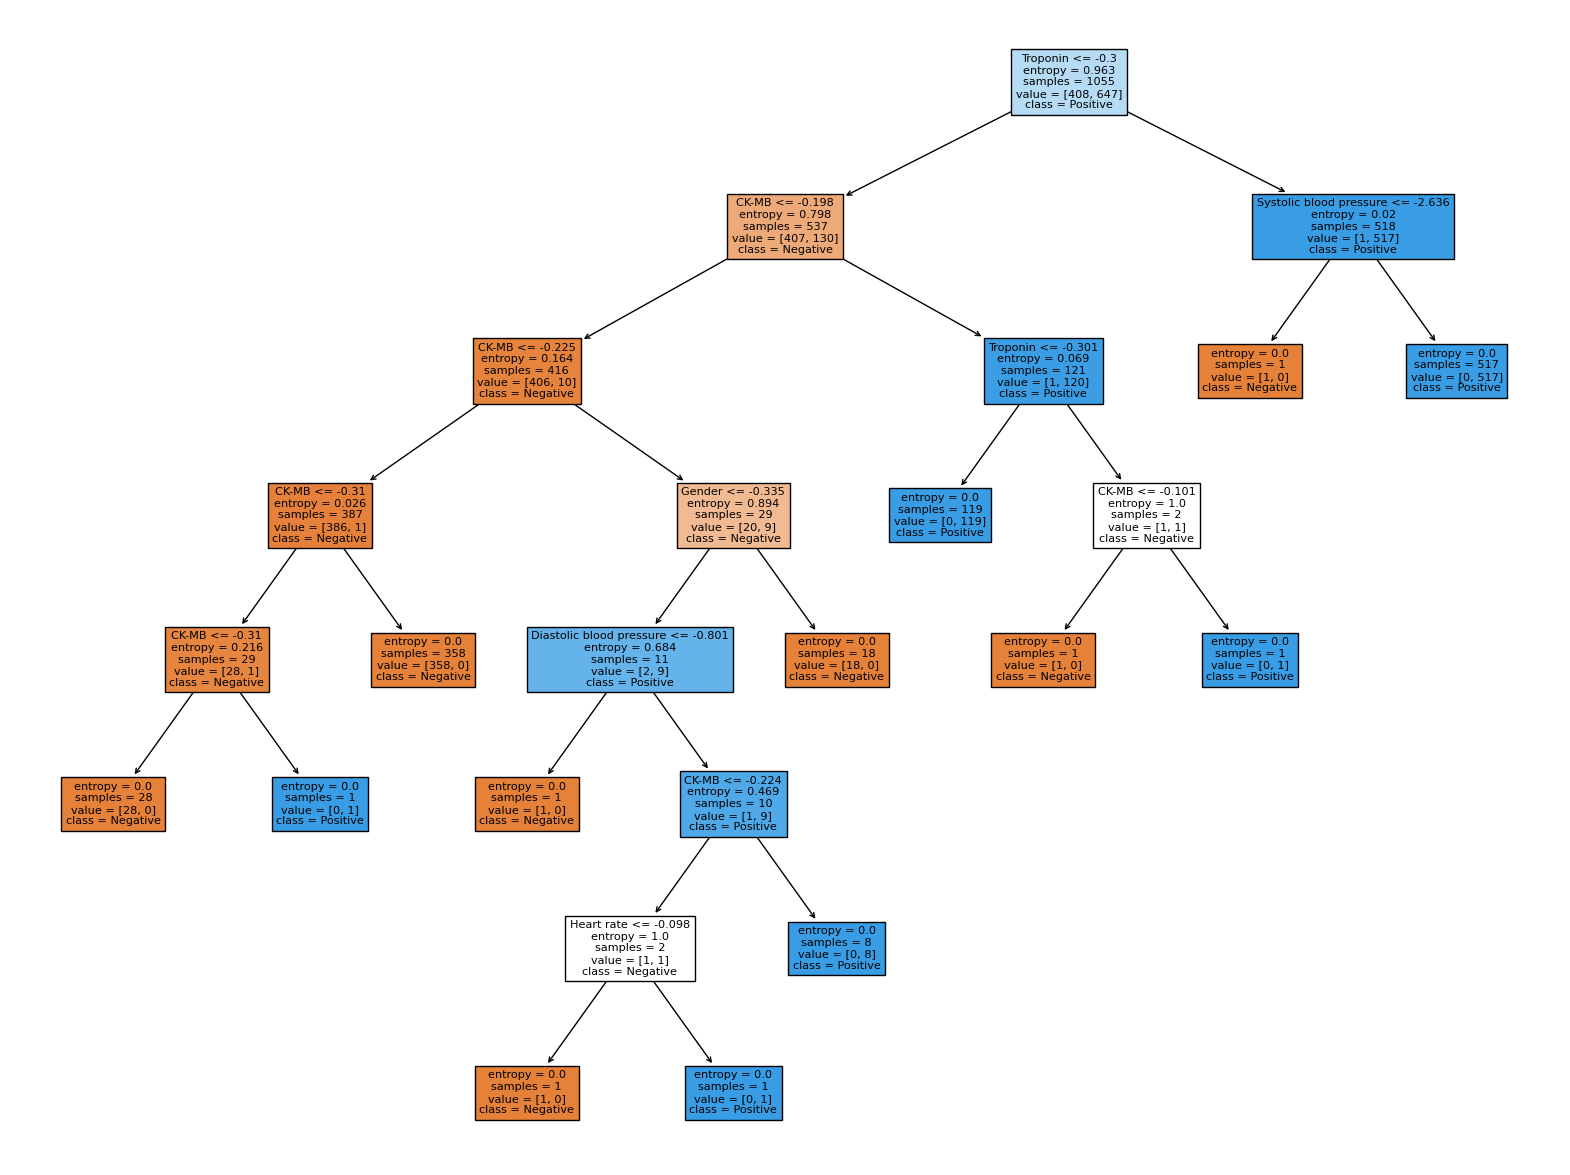

In [40]:
# Construire l'arbre de décision
plt.figure(figsize=(20,15))
plot_tree(dt_classifier,filled=True,feature_names=['Age','Gender', 'Heart rate', 'Systolic blood pressure','Diastolic blood pressure', 'Blood sugar', 'CK-MB', 'Troponin'],class_names=['Negative','Positive'])

In [42]:
# Classification Algorithms
# Decision Tree
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train_scaled, y_train)
dt_y_pred = dt_classifier.predict(X_test_scaled)

# Random Forest
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train_scaled, y_train)
rf_y_pred = rf_classifier.predict(X_test_scaled)

# AdaBoost
adb_classifier = AdaBoostClassifier()
adb_classifier.fit(X_train_scaled, y_train)
adb_y_pred = adb_classifier.predict(X_test_scaled)

# SVM
svm_classifier = SVC()
svm_classifier.fit(X_train_scaled, y_train)
svm_y_pred = svm_classifier.predict(X_test_scaled)

# KNN
knn_classifier = KNeighborsClassifier()
knn_classifier.fit(X_train_scaled, y_train)
knn_y_pred = knn_classifier.predict(X_test_scaled)

# Naive Bayes
nb_classifier = GaussianNB()
nb_classifier.fit(X_train_scaled, y_train)
nb_y_pred = nb_classifier.predict(X_test_scaled)

# Evaluation Metrics
def evaluate_classifier(y_true, y_pred, classifier_name):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    print(f"Evaluation metrics for {classifier_name}:")
    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1 Score: {f1}\n")

evaluate_classifier(y_test, dt_y_pred, "Decision Tree")
evaluate_classifier(y_test, rf_y_pred, "Random Forest")
evaluate_classifier(y_test, adb_y_pred, "AdaBoost")
evaluate_classifier(y_test, svm_y_pred, "SVM")
evaluate_classifier(y_test, knn_y_pred, "KNN")
evaluate_classifier(y_test, nb_y_pred, "Naive Bayes")



Evaluation metrics for Decision Tree:
Accuracy: 0.9734848484848485
Precision: 0.9814814814814815
Recall: 0.9754601226993865
F1 Score: 0.9784615384615385

Evaluation metrics for Random Forest:
Accuracy: 0.9772727272727273
Precision: 0.9815950920245399
Recall: 0.9815950920245399
F1 Score: 0.98159509202454

Evaluation metrics for AdaBoost:
Accuracy: 0.9772727272727273
Precision: 0.9815950920245399
Recall: 0.9815950920245399
F1 Score: 0.98159509202454

Evaluation metrics for SVM:
Accuracy: 0.7348484848484849
Precision: 0.7540983606557377
Recall: 0.8466257668711656
F1 Score: 0.7976878612716763

Evaluation metrics for KNN:
Accuracy: 0.6439393939393939
Precision: 0.7041420118343196
Recall: 0.7300613496932515
F1 Score: 0.716867469879518

Evaluation metrics for Naive Bayes:
Accuracy: 0.7916666666666666
Precision: 0.990909090909091
Recall: 0.6687116564417178
F1 Score: 0.7985347985347986



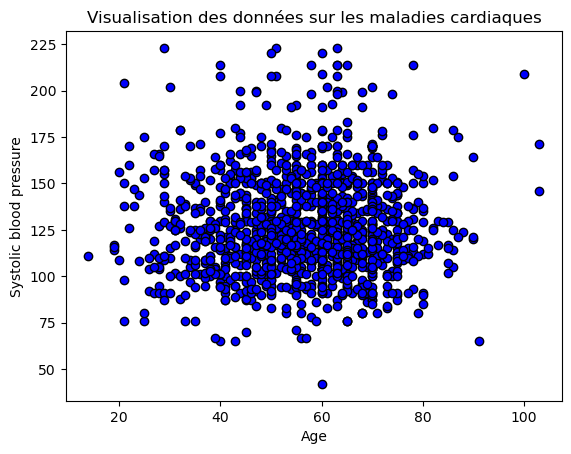

C:\Users\genev\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\genev\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


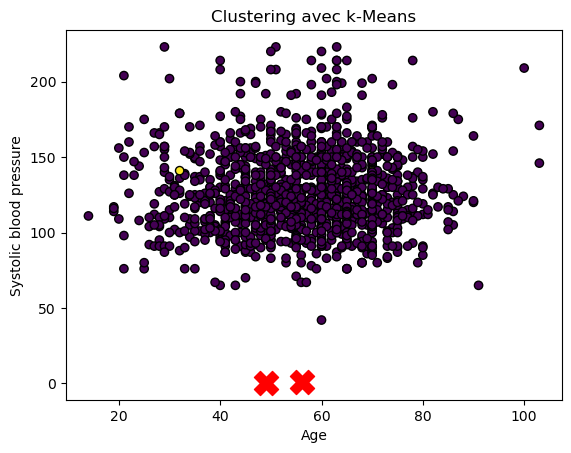

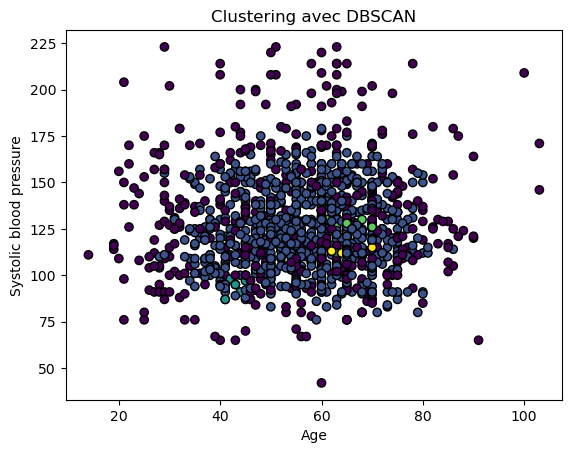

Silhouette Score pour k-Means: 0.9403438336721951


In [43]:
# Visualisation des données dans une grille 2D
plt.scatter(X['Age'], X['Systolic blood pressure'], c='blue', marker='o', edgecolors='black')
plt.xlabel('Age')
plt.ylabel('Systolic blood pressure')
plt.title('Visualisation des données sur les maladies cardiaques')
plt.show()

# k-Means Clustering
def kmeans_clustering(X, n_clusters):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(X)
    cluster_labels = kmeans.labels_
    centroids = kmeans.cluster_centers_
    silhouette_avg = silhouette_score(X, cluster_labels)
    return cluster_labels, centroids, silhouette_avg

# Clustering Hiérarchique Agglomératif
def hierarchical_clustering(X, n_clusters):
    agg_clustering = AgglomerativeClustering(n_clusters=n_clusters)
    cluster_labels = agg_clustering.fit_predict(X)
    return cluster_labels

# Clustering DBSCAN
def dbscan_clustering(X, eps, min_samples):
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    cluster_labels = dbscan.fit_predict(X)
    return cluster_labels

# Clustering HDBSCAN (dans ce cas, HDBSCAN est utilisé comme DBSCAN avec des valeurs de paramètres adaptées)
def hdbscan_clustering(X, min_samples, eps):
    cluster_labels = dbscan_clustering(X, eps, min_samples)
    return cluster_labels

# Application de k-Means avec un nombre prédéfini de clusters
k = 2
kmeans_labels, kmeans_centroids, kmeans_silhouette = kmeans_clustering(X, k)

# Visualisation des résultats du clustering k-Means
plt.scatter(X['Age'], X['Systolic blood pressure'], c=kmeans_labels, cmap='viridis', marker='o', edgecolors='black')
plt.scatter(kmeans_centroids[:, 0], kmeans_centroids[:, 1], s=300, c='red', marker='X')
plt.xlabel('Age')
plt.ylabel('Systolic blood pressure')
plt.title('Clustering avec k-Means')
plt.show()

# Application du clustering hiérarchique agglomératif avec un nombre prédéfini de clusters
agg_labels = hierarchical_clustering(X, k)

# Clustering DBSCAN avec des valeurs de paramètres (min_samples, eps) choisies au hasard
dbscan_eps = 10
dbscan_min_samples = 5
dbscan_labels = dbscan_clustering(X, dbscan_eps, dbscan_min_samples)

# Visualisation des résultats du clustering DBSCAN
plt.scatter(X['Age'], X['Systolic blood pressure'], c=dbscan_labels, cmap='viridis', marker='o', edgecolors='black')
plt.xlabel('Age')
plt.ylabel('Systolic blood pressure')
plt.title('Clustering avec DBSCAN')
plt.show()

# Clustering HDBSCAN avec des valeurs de paramètres (min_samples, eps) choisies au hasard
hdbscan_labels = hdbscan_clustering(X, dbscan_min_samples, dbscan_eps)

# Impression des résultats
print("Silhouette Score pour k-Means:", kmeans_silhouette)
